<h1>KNN (Slovakia)<h1>

In [1]:
# Import library yang dipakai
import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score, precision_recall_fscore_support, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Masukkan dataset Slovakia dan Indonesia
## responses.csv = Slovakia
## responsesid.csv = Indonesia
## Jadi kalau mau memproses data, ganti namanya dari cadangan menjadi feat, dan satunya menjadi cadangan
df = pd.read_csv('responses.csv')
cadangan = pd.read_csv('responsesid.csv')
df = df.dropna()

# Ambil feature yang kita mau
featPred = df[["Music","Slow songs or fast songs","Dance","Folk","Country","Classical music","Musical","Pop","Rock","Metal or Hardrock","Punk","Hiphop, Rap","Reggae, Ska","Swing, Jazz","Rock n roll","Alternative","Latino","Techno, Trance","Opera","Smoking"]]

In [3]:
# Mengubah target dari kategorikal menjadi boolean (1 dan 2)
featPred[['Smoking']] = featPred[['Smoking']].replace({'never smoked': 0, 'tried smoking': 0, 'former smoker': 1, 'current smoker': 1})

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [4]:
featPred.corr(method='pearson')

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Smoking
Music,1.000000,0.079243,0.079587,0.065234,0.004119,0.092681,0.065404,0.053930,0.162643,0.020999,0.084596,0.062623,0.039235,0.092354,0.112154,0.128613,0.058902,0.058988,0.062045,0.075130
Slow songs or fast songs,0.079243,1.000000,0.122408,-0.069242,-0.109378,-0.155253,-0.093498,0.024410,0.011693,0.064762,0.056187,0.098162,0.026369,-0.124804,-0.006935,-0.004311,-0.028030,0.145749,-0.160950,0.051806
Dance,0.079587,0.122408,1.000000,0.091042,0.061305,-0.093182,0.121614,0.452687,-0.150469,-0.258661,-0.161762,0.400690,0.125396,0.042746,-0.040377,-0.158017,0.312190,0.404878,-0.065941,0.041485
Folk,0.065234,-0.069242,0.091042,1.000000,0.389059,0.374284,0.252281,0.015599,0.103242,0.067313,0.036217,-0.088376,0.106709,0.274637,0.199045,0.168131,0.247640,-0.025736,0.329402,-0.087859
Country,0.004119,-0.109378,0.061305,0.389059,1.000000,0.235070,0.199446,-0.006747,0.135381,0.106008,0.064509,-0.081983,0.119427,0.219604,0.292080,0.058013,0.163909,0.017984,0.228586,-0.088944
Classical music,0.092681,-0.155253,-0.093182,0.374284,0.235070,1.000000,0.369181,-0.051817,0.184845,0.149890,0.072537,-0.151233,0.025927,0.420274,0.266450,0.305320,0.134714,-0.024026,0.599296,-0.084942
Musical,0.065404,-0.093498,0.121614,0.252281,0.199446,0.369181,1.000000,0.215884,0.063993,-0.059421,-0.019241,-0.022846,0.089765,0.250542,0.206267,0.062952,0.352344,-0.065102,0.419671,-0.090138
Pop,0.053930,0.024410,0.452687,0.015599,-0.006747,-0.051817,0.215884,1.000000,-0.043662,-0.303731,-0.169088,0.293387,0.017263,-0.034342,-0.017564,-0.219839,0.281049,0.174364,-0.069098,-0.024345
Rock,0.162643,0.011693,-0.150469,0.103242,0.135381,0.184845,0.063993,-0.043662,1.000000,0.533176,0.514398,-0.209140,0.130062,0.212503,0.486771,0.346116,-0.047623,-0.096778,0.106804,0.028254
Metal or Hardrock,0.020999,0.064762,-0.258661,0.067313,0.106008,0.149890,-0.059421,-0.303731,0.533176,1.000000,0.529328,-0.233080,0.076924,0.101785,0.284223,0.275359,-0.144692,-0.036622,0.129903,0.045561


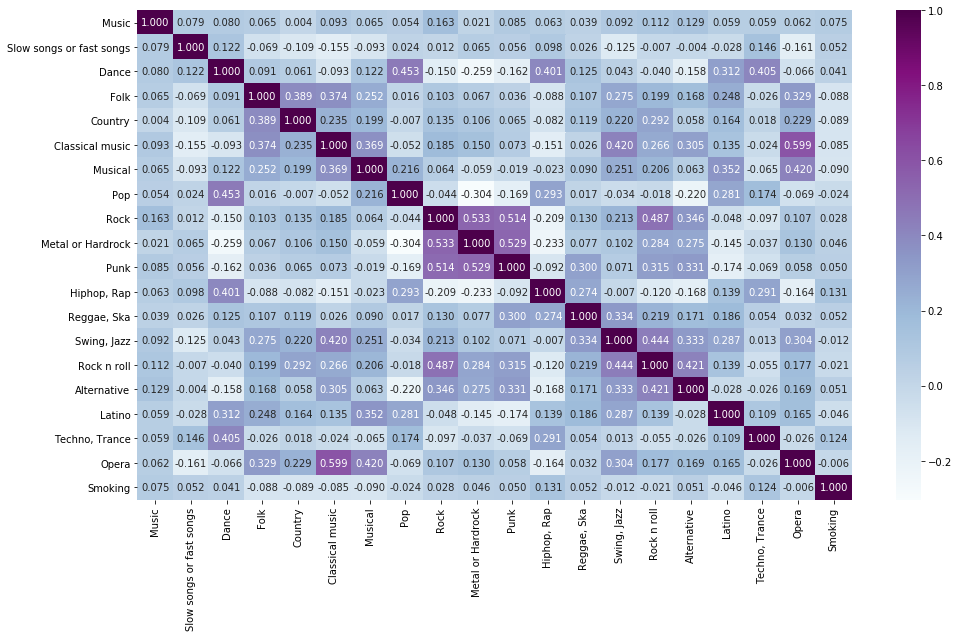

In [5]:
# Melihat correlation matrix dari dataset kita
plt.figure(figsize=(16,9))
sns.heatmap(featPred.corr(method='pearson'), annot=True, fmt='.3f', cmap='BuPu')

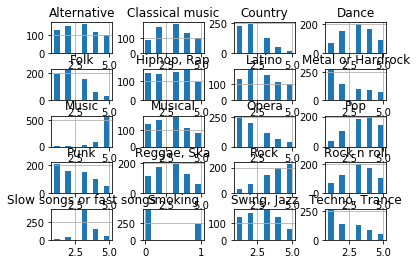

In [6]:
featPred.hist()
plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.rcParams["figure.figsize"] = [160,90]
plt.show()

In [7]:
# Pisahkan feature dari target
X = featPred[["Music","Slow songs or fast songs","Dance","Folk","Country","Classical music","Musical","Pop","Rock","Metal or Hardrock","Punk","Hiphop, Rap","Reggae, Ska","Swing, Jazz","Rock n roll","Alternative","Latino","Techno, Trance","Opera"]].values
y = featPred[["Smoking"]].values

In [8]:
# Split menjadi training set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
# Buat model KNN dengan 35 neighbor untuk data Slovakia dan 5 neighbor untuk data Indonesia
# (sesuai dengan rekomendasi best k di bagian bawah nanti)
classifier = KNeighborsClassifier(n_neighbors=35)

# Train modelnya
classifier.fit(X_train, y_train)

# Predict
y_pred = classifier.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [10]:
# Lihat confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(79, 2, 53, 1)

In [11]:
# Hitung akurasi

accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 59.26 %.


In [12]:
# Mencari k terbaik

# Membuat list pilihan k untuk KNN
k_list = list(range(1,50,2))

cv_scores = []

# Melakukan cross validation 10-fold
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y

<Figure size 11520x6480 with 0 Axes>

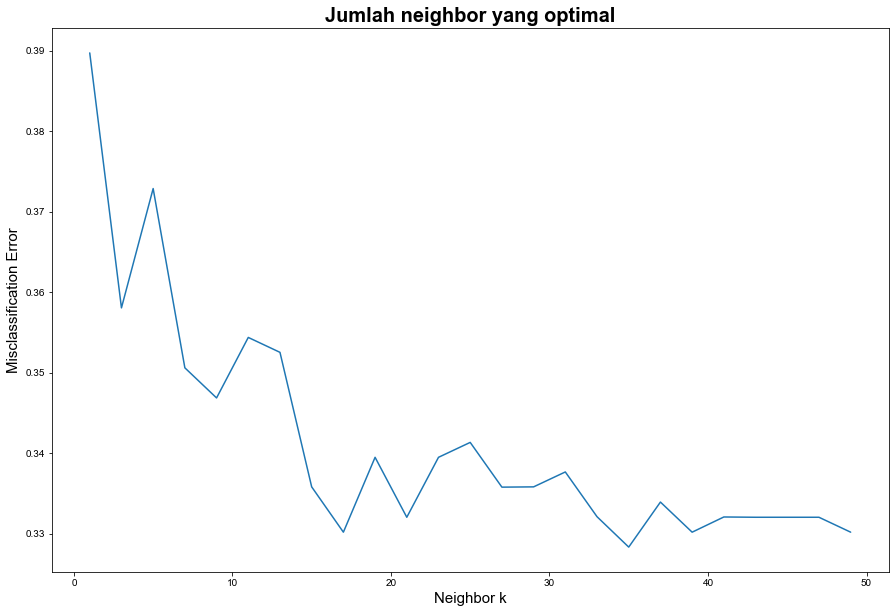

In [13]:
# Ubah menjadi Misclassification Error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('Jumlah neighbor yang optimal', fontsize=20, fontweight='bold')
plt.xlabel('Neighbor k', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [14]:
# Dari hasil tersebut dapat diketahui k terbaik:
# Slovakia = 35
# Indonesia = 5
best_k = k_list[MSE.index(min(MSE))]
print("Jumlah optimal untuk neighbor k adalah %d." % best_k)

Jumlah optimal untuk neighbor k adalah 35.


In [15]:
# Print Precision, Recall, F1 score, dan Support
precision_recall_fscore_support(y_test, y_pred, average='macro')

(0.46590909090909094, 0.49691358024691357, 0.38843587842846555, None)